In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


<function matplotlib.pyplot.show(close=None, block=None)>

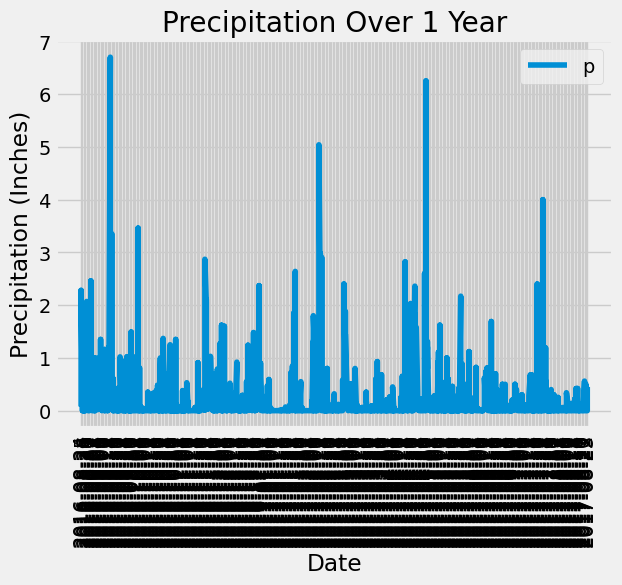

In [47]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
year_ago = recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
year_data = session.query(measurement.date, measurement.prcp).filter(measurement.date > year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(year_data, columns=['Date', 'Precipitation'])
final_prcp_df = precipitation_df.dropna(how='any')

# Sort the dataframe by date
chronological_df = final_prcp_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(chronological_df['Date'], chronological_df['Precipitation'])
plt.title('Precipitation Over 1 Year')
plt.xlabel('Date')
plt.ylabel('Precipitation (Inches)')
plt.xticks(rotation=90)
plt.legend('precipitation', loc="upper right")
plt.show

In [48]:
# Use Pandas to calculate the summary statistics for the precipitation data
chronological_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [51]:
# Design a query to calculate the total number of stations in the dataset
station_count =session.query(station.station).count()
station_count

9

In [53]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station).label('count')).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [55]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperatures = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
temperatures

[(54.0, 85.0, 71.66378066378067)]

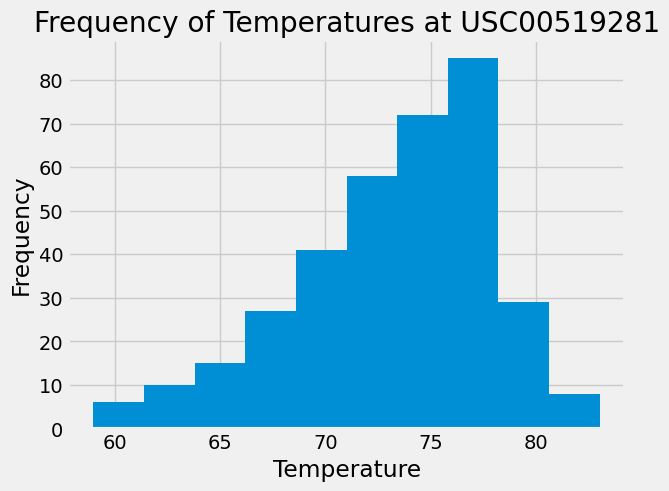

In [69]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_temperatures = session.query(measurement.tobs).filter(measurement.station == 'USC00519281', measurement.date > year_ago).all()
#Flatten the tuples!
temps = [temp[0] for temp in year_temperatures]

plt.hist(temps)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Frequency of Temperatures at USC00519281')
plt.show()

# Close Session

In [70]:
# Close Session
session.close()